In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

### Conociendo los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Normalizando JSON

In [5]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Normalizando Columnas

In [6]:
df.rename(columns=lambda x: x.split('.', 1)[-1], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Conociendo los valores únicos de cada columna

In [8]:
for columna in df.columns:
  valores_unicos = df[columna].unique()
  print(f"Valores unicos de la columna {columna}:")
  print(valores_unicos)
  print(" ")

Valores unicos de la columna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
 
Valores unicos de la columna Churn:
['No' 'Yes' '']
 
Valores unicos de la columna gender:
['Female' 'Male']
 
Valores unicos de la columna SeniorCitizen:
[0 1]
 
Valores unicos de la columna Partner:
['Yes' 'No']
 
Valores unicos de la columna Dependents:
['Yes' 'No']
 
Valores unicos de la columna tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
 
Valores unicos de la columna PhoneService:
['Yes' 'No']
 
Valores unicos de la columna MultipleLines:
['No' 'Yes' 'No phone service']
 
Valores unicos de la columna InternetService:
['DSL' 'Fiber optic' 'No']
 
Valores unicos de la columna OnlineSecurity:
['No' 'Yes' 'No internet service']
 
Valores unicos de la columna OnlineBackup:
[

###Comprobación de incoherencias en los datos



1.   *Campos vacíos*

*   Churn
*   Charges.Total

2.   *Información duplicada*


*   MultipleLines
*   OnlineSecurity
*   OnlineBackup
*   DeviceProtection
*   TechSupport
*   StreamingTV
*   StreamingMovies

3.   *Campos String que deben ser Númericos*

*   Charges.Total



### Manejo de inconsistencias

Eliminación de datos vacíos

In [9]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

Transformación de duplicados

In [11]:
df.replace(['No phone service', 'No internet service'] , 'No', inplace=True)

Cambiando Tipo de dato

In [12]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

###Estandarización y transformación de datos

In [13]:
datos_estandarizados = {
    'No': 0,
    'Yes': 1,
}

df.replace(datos_estandarizados, inplace=True);

/tmp/ipython-input-963574012.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(datos_estandarizados, inplace=True);


In [14]:
mapeo_columnas = {
    # Identificación y Objetivo
    "customerID": "ID_Cliente",
    "Churn": "Abandono",

    # Demografía
    "gender": "Genero",
    "SeniorCitizen": "Es_Adulto_Mayor",
    "Partner": "Tiene_Pareja",
    "Dependents": "Tiene_Dependientes",

    # Servicios Principales
    "tenure": "Meses_Permanencia",
    "PhoneService": "Servicio_Telefonico",
    "MultipleLines": "Lineas_Multiples",
    "InternetService": "Tipo_Internet",

    # Servicios Adicionales (Add-ons)
    "OnlineSecurity": "Seguridad_Online",
    "OnlineBackup": "Copia_Seguridad",
    "DeviceProtection": "Proteccion_Dispositivo",
    "TechSupport": "Soporte_Tecnico",
    "StreamingTV": "TV_Streaming",
    "StreamingMovies": "Peliculas_Streaming",

    # Información Financiera y Contrato
    "Contract": "Tipo_Contrato",
    "PaperlessBilling": "Facturacion_Digital",
    "PaymentMethod": "Metodo_Pago",
    "Charges.Monthly": "Cargos_Mensuales",
    "Charges.Total": "Cargos_Totales"
}

df.rename(columns=mapeo_columnas, inplace=True)

###Creación de Columna de cuentas diarias

In [15]:
df["Cuentas_Diarias"] = (df["Cargos_Mensuales"] / 31).round(2)

In [16]:
df.head()

,ID_Cliente,Abandono,Genero,Es_Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.12
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.93
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.38
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.16
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.71


#📊 Carga y análisis

###Análisis Descriptivo

In [17]:
df.describe()

,Abandono,Es_Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Permanencia,Servicio_Telefonico,Lineas_Multiples,Seguridad_Online,Copia_Seguridad,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Facturacion_Digital,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.090300
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.970544
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.150000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.270000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.900000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.830000


#  Resumen de Hallazgos e Insights (EDA Preliminar)

A continuación se presentan los puntos clave detectados tras la limpieza estadística inicial (`.describe()`) y normalización de datos.

---

### 1.  La Variable Clave: `Abandono` (Churn)
* **Tasa de Fuga:** `26.6%` (Clientes que se fueron).
* **Tasa de Retención:** `73.4%` (Clientes activos).
> ** Insight Crítico:** Nos enfrentamos a un **dataset desbalanceado**.

### 2.  Comportamiento Financiero (El dinero)
Existe una discrepancia notable en cómo gastan los clientes:

| Variable | Promedio ($\mu$) | Mediana ($50\%$) | Interpretación |
| :--- | :--- | :--- | :--- |
| **Cargos Mensuales** | `$64.80` | `$70.35` | Distribución balanceada. |
| **Cargos Totales** | **`$2,283`** | **`$1,397`** | **Sesgo positivo fuerte**. |

> ** Insight:** El promedio de *Cargos Totales* está inflado por un grupo de clientes de muy larga duración ("Ballenas") que han pagado sumas altas (hasta \$8,684). La mayoría de los clientes se encuentra en rangos mucho menores.

### 3.  Perfil Demográfico y Servicios
* **Adultos Mayores:** Representan solo el **16.2%** de la base. El producto es consumido mayoritariamente por población joven/adulta.
* **Telefonía:** Es un servicio casi universal (**90.3%** de penetración).
* **Digitalización:** El **59.3%** prefiere `Facturacion_Digital` (Paperless), indicando una buena adopción tecnológica.

### 4.  Calidad de los Datos
* **Registros Totales:** `7,032` (Dataset final).
* **Limpieza:** Se eliminaron 11 registros nulos provenientes de espacios vacíos en `Charges.Total` y 224 de `Churn`.

###Distribución de evasión

/tmp/ipython-input-3699408550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df, x='Abandono', palette="Paired")


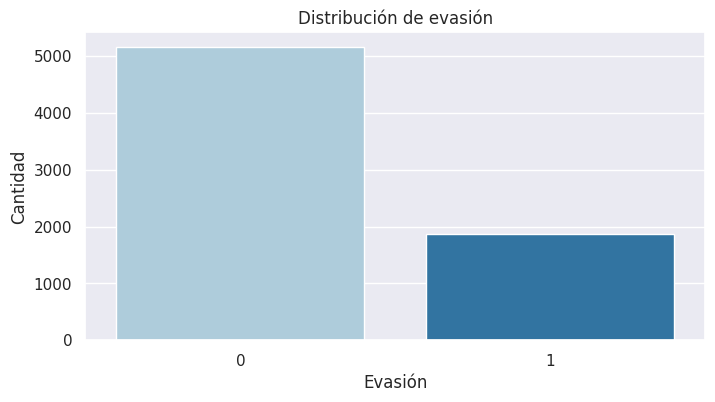

In [18]:
sns.set_theme()

plt.figure(figsize=(8, 4))
ax = sns.countplot(data= df, x='Abandono', palette="Paired")
plt.title('Distribución de evasión')
plt.ylabel('Cantidad')
plt.xlabel('Evasión')
sns.set(style="whitegrid")
plt.show()

###Recuento de evasión por variables categóricas

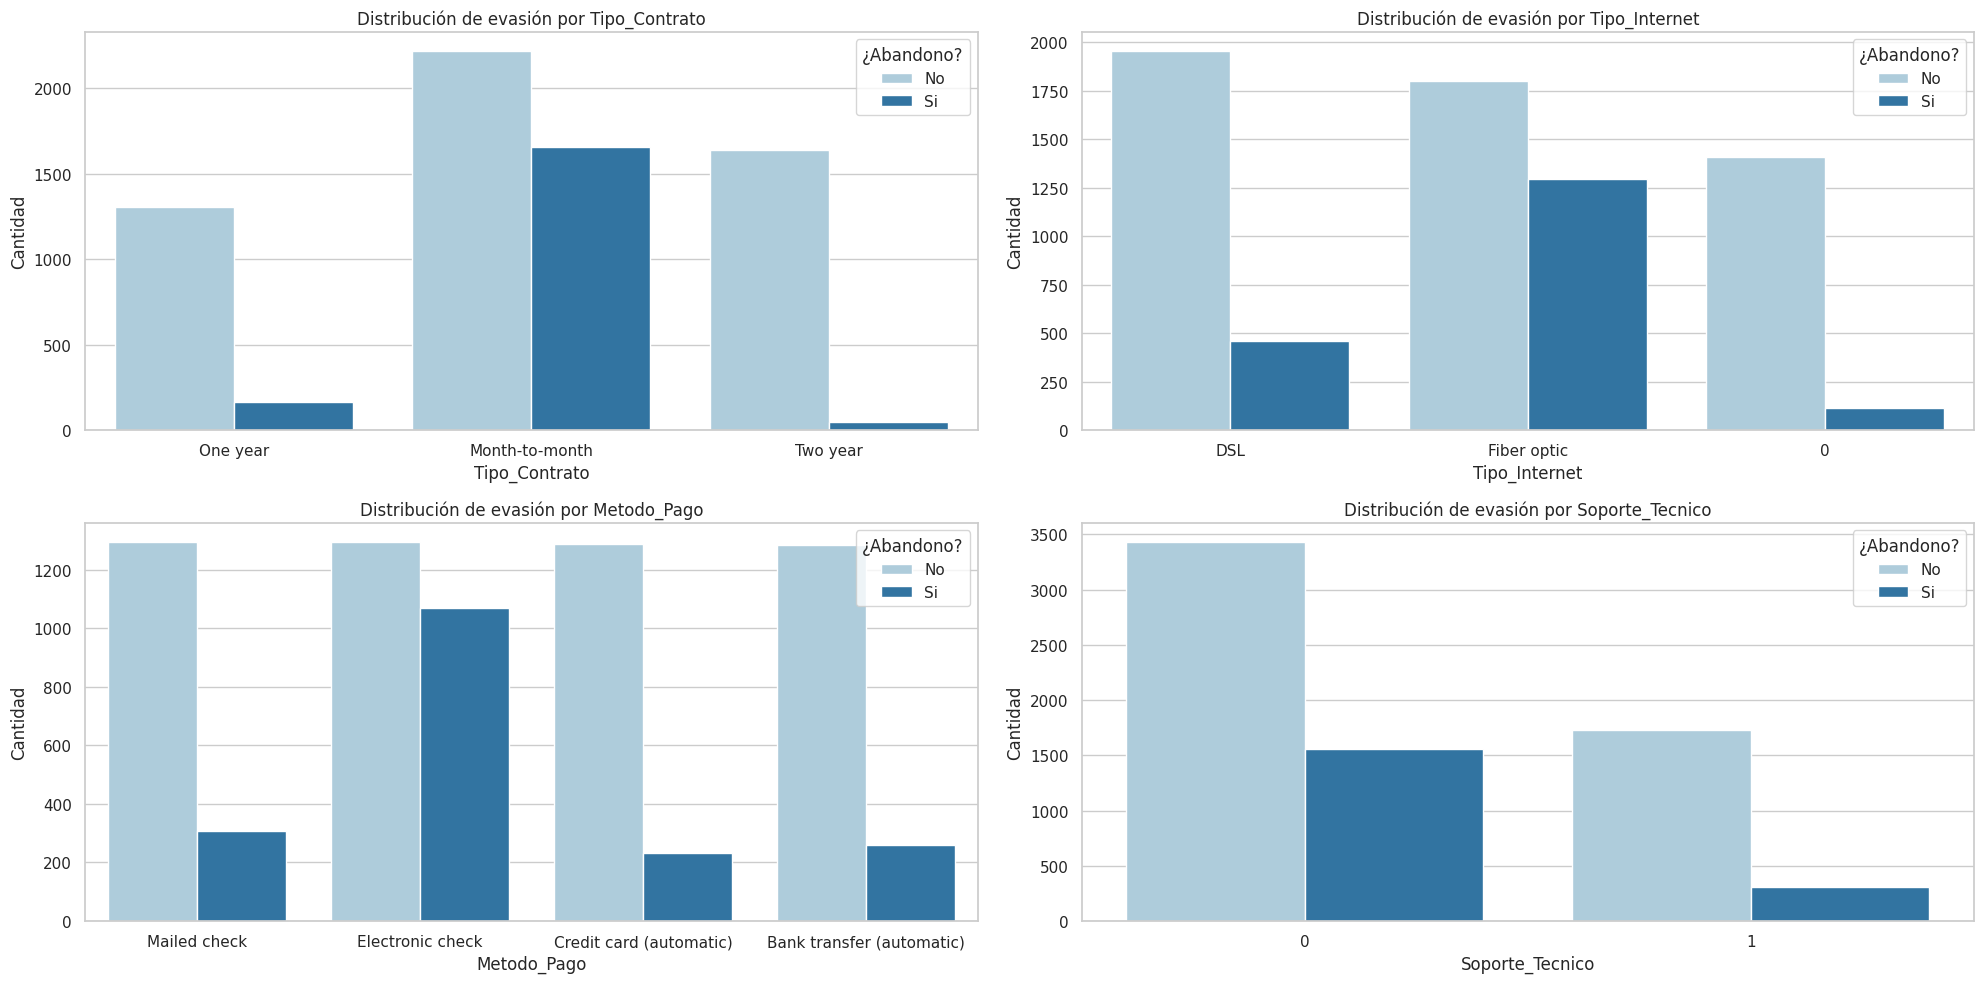

In [19]:
# Seleccionamos las 4 variables con mayor impacto en el negocio
columnas_top = [
    'Tipo_Contrato',   # Fundamental
    'Tipo_Internet',   # Tecnológica
    'Metodo_Pago',     # Financiera
    'Soporte_Tecnico'  # Servicio Agregado
]

fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.flatten() # Con esto dejamos de pensar en coordenadas (x,y) y lo pasamos a un formato lista

for col, ax in zip(columnas_top, axes):
  sns.countplot(data=df, hue="Abandono", x=col, ax=ax, palette="Paired")
  ax.set_title(f'Distribución de evasión por {col}')
  ax.set_ylabel('Cantidad')
  ax.legend(title= '¿Abandono?', labels= ["No", "Si"])

plt.tight_layout()
plt.show()


###Conteo de evasión por variables numéricas

/tmp/ipython-input-2197328142.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se fue'])
/tmp/ipython-input-2197328142.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se fue'])
/tmp/ipython-input-2197328142.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se fue'])


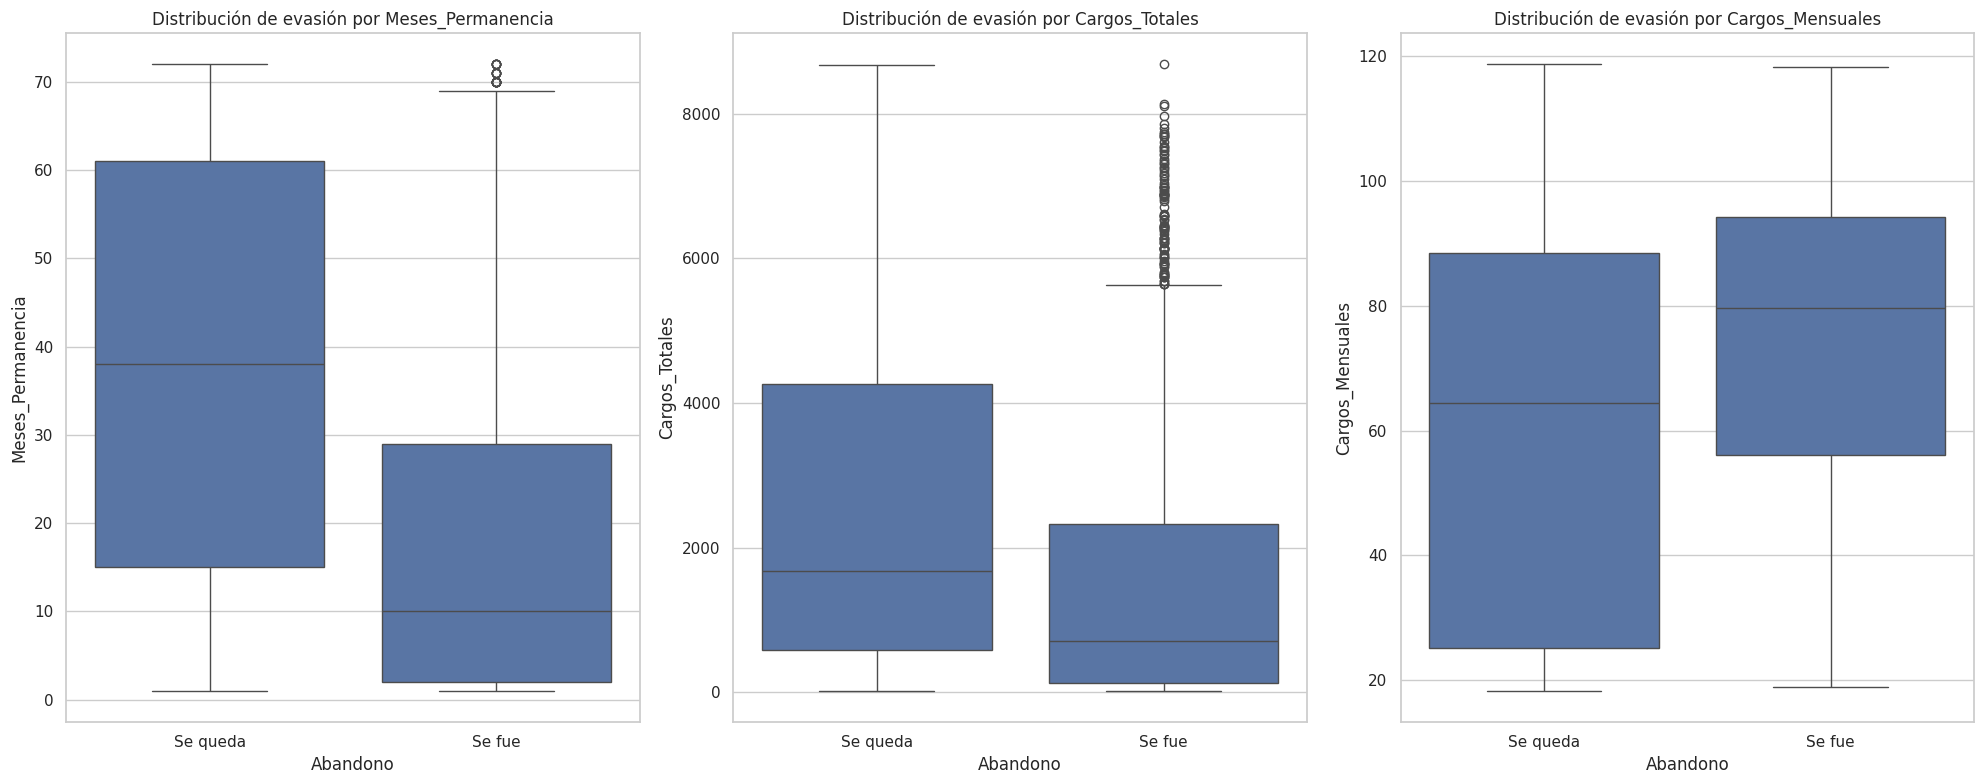

In [20]:
columnas_numericas = ["Meses_Permanencia", "Cargos_Totales", "Cargos_Mensuales"]

fig, axes = plt.subplots(1,3, figsize=(20,8))
axes = axes.flatten()

for col, ax in zip(columnas_numericas, axes):
  sns.boxplot(data=df, y=col, x="Abandono", ax=ax)
  ax.set_title(f'Distribución de evasión por {col}')
  ax.set_xticklabels(['Se queda', 'Se fue'])

plt.tight_layout()
plt.show()


#📄Informe final

<div style="font-family: Arial, sans-serif; color: #333333; line-height: 1.6;">

<div style="background-color: #002b5c; padding: 20px; border-radius: 5px 5px 0 0;">
  <h1 style="color: #ffffff; margin: 0; text-align: center; letter-spacing: 1px;">INFORME EJECUTIVO: ANÁLISIS DE RETENCIÓN DE CLIENTES</h1>
  <p style="color: #aabbd1; margin: 5px 0 0 0; text-align: center; font-size: 0.9em;">PROYECTO: TELECOM X</p>
</div>

<h2 style="color: #002b5c; border-bottom: 2px solid #002b5c; padding-bottom: 5px; margin-top: 30px;">1. INTRODUCCIÓN Y ALCANCE</h2>
<p>
  En respuesta a la creciente tasa de cancelación de servicios (Churn) en <strong>Telecom X</strong>, se ha llevado a cabo un análisis de datos transaccionales y demográficos. El objetivo central de este reporte es identificar los factores determinantes que influyen en la decisión de abandono del cliente y proponer estrategias basadas en evidencia para mitigar la fuga de capital.
</p>

<h2 style="color: #002b5c; border-bottom: 2px solid #002b5c; padding-bottom: 5px; margin-top: 30px;">2. PROCESAMIENTO Y CALIDAD DE DATOS (ETL)</h2>
<p>Se procesó un conjunto de datos inicial de <strong>7,267 registros</strong> provenientes de fuentes no estructuradas (JSON). El flujo de trabajo técnico garantizó la integridad de la información mediante las siguientes fases:</p>

<ul style="list-style-type: square;">
  <li><strong>Normalización de Estructura:</strong> Desanidamiento de objetos JSON complejos, transformando la arquitectura de datos de 6 a 21 variables analíticas.</li>
  <li><strong>Saneamiento de Datos:</strong>
      <ul>
          <li>Identificación y eliminación de registros nulos en variables críticas (<i>Churn</i> y <i>Cargos_Totales</i>), resultando en un dataset final de <strong>N = 7,032</strong>.</li>
          <li>Estandarización de nomenclatura de columnas para asegurar consistencia técnica.</li>
      </ul>
  </li>
  <li><strong>Conversión de Tipos:</strong> Transformación de variables financieras (<i>Cargos_Mensuales</i>) a formato numérico (Float64) y binarización de variables categóricas para análisis estadístico.</li>
</ul>

<h2 style="color: #002b5c; border-bottom: 2px solid #002b5c; padding-bottom: 5px; margin-top: 30px;">3. ANÁLISIS EXPLORATORIO: DIAGNÓSTICO SITUACIONAL</h2>

<div style="background-color: #f0f4f8; border-left: 5px solid #002b5c; padding: 15px; margin-bottom: 20px;">
  <strong>Balance General del Dataset:</strong> Se observa un desequilibrio de clases con una Tasa de Retención del <strong>73.4%</strong> frente a una Tasa de Abandono del <strong>26.6%</strong>.
</div>

<h3 style="color: #004080;">3.1. Factores Críticos de Abandono (Análisis Categórico)</h3>
<ul>
  <li><strong>Sensibilidad Contractual:</strong> Se nota una posible correlación directa entre la modalidad de contrato y la fuga. Los usuarios con contratos <i>"Month-to-month"</i> representan el segmento de mayor riesgo, mientras que los contratos anuales muestran niveles de fidelidad superiores al 90%.</li>
  <li><strong>Fricción en Pagos:</strong> El método de pago <i>"Electronic Check"</i> presenta una anomalía significativa, registrando la tasa de abandono más alta en comparación con métodos automatizados (tarjetas de crédito o transferencias bancarias).</li>
  <li><strong>Desempeño del Servicio Premium:</strong> Los usuarios de <i>Fibra Óptica</i>, a pesar de representar el segmento de mayor facturación, muestran tasas de cancelación superiores a los usuarios de DSL, indicando una posible discrepancia entre precio y calidad percibida.</li>
</ul>

<h3 style="color: #004080;">3.2. Comportamiento Financiero y Temporal (Análisis Numérico)</h3>
<ul>
  <li><strong>Curva de Permanencia:</strong> El riesgo de fuga es crítico durante los primeros <strong>12 meses</strong> de vida del cliente. Superado este umbral, la probabilidad de cancelación desciende drásticamente.</li>
  <li><strong>Relación Precio-Fuga:</strong> El análisis de distribución (Boxplots) confirma que los clientes que abandonan tienen, en promedio, una facturación mensual superior ($80 USD aprox$.) frente a los que permanecen ($60 USD aprox.$).</li>
</ul>

<h2 style="color: #002b5c; border-bottom: 2px solid #002b5c; padding-bottom: 5px; margin-top: 30px;">4. CONCLUSIONES Y RECOMENDACIONES ESTRATÉGICAS</h2>
<p>Basado en los patrones identificados, se proponen las siguientes acciones correctivas de alto impacto:</p>

<table style="width: 100%; border-collapse: collapse; margin-top: 15px;">
  <tr style="background-color: #002b5c; color: white;">
      <th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Área de Enfoque</th>
      <th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Acción Recomendada</th>
  </tr>
  <tr>
      <td style="padding: 10px; border: 1px solid #ddd; font-weight: bold;">Retención Temprana</td>
      <td style="padding: 10px; border: 1px solid #ddd;">Implementar programa de "Onboarding" agresivo durante el primer año, donde se concentra la mayor tasa de deserción.</td>
  </tr>
  <tr>
      <td style="padding: 10px; border: 1px solid #ddd; font-weight: bold;">Optimización de Pagos</td>
      <td style="padding: 10px; border: 1px solid #ddd;">Incentivar la migración de usuarios de "Electronic Check" hacia débitos automáticos mediante descuentos porcentuales (ej. 5% de descuento).</td>
  </tr>
  <tr>
      <td style="padding: 10px; border: 1px solid #ddd; font-weight: bold;">Estrategia de Producto</td>
      <td style="padding: 10px; border: 1px solid #ddd;">Auditoría de calidad sobre el servicio de Fibra Óptica y revisión de precios para mejorar la competitividad en el segmento Premium.</td>
  </tr>
  <tr>
      <td style="padding: 10px; border: 1px solid #ddd; font-weight: bold;">Servicios Agregados</td>
      <td style="padding: 10px; border: 1px solid #ddd;">Promover la inclusión de Soporte Técnico en paquetes básicos, dado su comprobado efecto como barrera de salida.</td>
  </tr>
</table>

<div style="margin-top: 30px; font-size: 0.8em; color: #666; text-align: center; border-top: 1px solid #ccc; padding-top: 10px;">
  Documento generado para revisión interna | Telecom X Analytics
</div>

